<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#OTU-rep-seqs" data-toc-modified-id="OTU-rep-seqs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>OTU rep seqs</a></span></li><li><span><a href="#Mapping-SVs-to-EMP-OTUs" data-toc-modified-id="Mapping-SVs-to-EMP-OTUs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Mapping SVs to EMP-OTUs</a></span><ul class="toc-item"><li><span><a href="#Making-blastdb" data-toc-modified-id="Making-blastdb-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Making blastdb</a></span></li><li><span><a href="#blastn" data-toc-modified-id="blastn-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>blastn</a></span></li><li><span><a href="#Parsing-blast-results" data-toc-modified-id="Parsing-blast-results-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Parsing blast results</a></span></li></ul></li><li><span><a href="#Getting-distribution-of-OTUs" data-toc-modified-id="Getting-distribution-of-OTUs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Getting distribution of OTUs</a></span><ul class="toc-item"><li><span><a href="#Getting-biomes-for-each-sample" data-toc-modified-id="Getting-biomes-for-each-sample-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Getting biomes for each sample</a></span></li><li><span><a href="#Adding-OTU-taxonomy-and-animal-dist" data-toc-modified-id="Adding-OTU-taxonomy-and-animal-dist-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Adding OTU taxonomy and animal-dist</a></span><ul class="toc-item"><li><span><a href="#Animal-abundance" data-toc-modified-id="Animal-abundance-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Animal abundance</a></span></li><li><span><a href="#env-abundance" data-toc-modified-id="env-abundance-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>env abundance</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Map animal gut OTUs (SVs) to EMP OTUs and determine their env distribution
  * EMP = Earth Microbiome Project

# Var

In [90]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S/env_dist/EMP/'
tmp_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/tmp/'

# representative OTU sequences for Georg animal dataset
rep_seq_qza_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/rep-seqs_merged_filt_r5k.qza'

# physeq of OTUs
physeq_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/physeq_r5k.RDS'

# emp files (downloaded from EMP FTP site)
## distribution of OTUs among EMP samples; 1st column is OTU rep sequence
emp_otu_dist_file = file.path(work_dir, 'otu_summary_no_chl.emp_deblur_90bp.subset_2k.rare_5000.tsv')
## mapping file that contains sample metadata (eg., BIOME)
emp_map_file = file.path(work_dir, 'emp_qiime_mapping_qc_filtered.tsv')

# params
threads = 24

# Init

In [91]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(phyloseq)
source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R') 

In [3]:
make_dir(work_dir)
make_dir(tmp_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S/env_dist/EMP/ 
Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/tmp/ 


# OTU rep seqs

* Converting 100% seqID OTUs to fasta file format

In [10]:
cmd = 'qiime tools export %s --output-dir %s'
cmd = sprintf(cmd, rep_seq_qza_file, tmp_dir)
bash_job(cmd, conda_env='qiime2-2018.6')

character(0)

In [11]:
dna_seq_file = file.path(tmp_dir, 'dna-sequences.fasta')
file.info(dna_seq_file)

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/tmp//dna-sequences.fasta,8721481,FALSE,644,2019-01-24 12:48:54,2019-01-24 12:48:59,2019-01-24 12:48:54,6354,353,nyoungblut,abt3


# Mapping SVs to EMP-OTUs

* Using blastn

## Making blastdb

```
# Creating a fasta file 
# rick:/ebio/abt3_projects/Georg_animal_feces/data/16S/env_dist/EMP
cut -f 1,2 otu_summary_no_chl.emp_deblur_90bp.subset_2k.rare_5000.tsv | tail -n +2 | perl -pe 's/^(\d+)\t(.+)/>$1\n$2/' > otu_summary_no_chl.emp_deblur_90bp.subset_2k.rare_5000.fna
```

In [13]:
cmd = 'makeblastdb -in %s -dbtype nucl'
blast_db_file = file.path(work_dir, 'otu_summary_no_chl.emp_deblur_90bp.subset_2k.rare_5000.fna')
cmd = sprintf(cmd, blast_db_file)
bash_job(cmd, conda_env='py3_genome')

[1] ""                                                                                                                                       
[2] ""                                                                                                                                       
[3] "Building a new DB, current time: 01/24/2019 12:55:40"                                                                                   
[4] "New DB name:   /ebio/abt3_projects/Georg_animal_feces/data/16S/env_dist/EMP/otu_summary_no_chl.emp_deblur_90bp.subset_2k.rare_5000.fna" 
[5] "New DB title:  /ebio/abt3_projects/Georg_animal_feces/data/16S/env_dist/EMP//otu_summary_no_chl.emp_deblur_90bp.subset_2k.rare_5000.fna"
[6] "Sequence type: Nucleotide"                                                                                                              
[7] "Keep MBits: T"                                                                                                                          
[8] "Maximum file size: 1000000000B"                                                                                                         
[9] "Adding sequences from FASTA; added 153302 sequences in 7.16337 seconds."

## blastn

In [4]:
blast_out_file = file.path(work_dir, 'rep-seqs_merged_filt_r5k_blastn-EMP.txt')
blast_out_file

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S/env_dist/EMP//rep-seqs_merged_filt_r5k_blastn-EMP.txt"

In [21]:
outfmt = '\\"6 qaccver saccver pident length mismatch gapopen qlen qstart qend slen sstart send evalue\\"'
cmd = 'blastn -query %s -db %s -out %s -evalue 1e-8 -num_threads %s -outfmt %s'
cmd = sprintf(cmd, dna_seq_file, blast_db_file, blast_out_file, threads, outfmt)
cmd

[1] "blastn -query /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/tmp//dna-sequences.fasta -db /ebio/abt3_projects/Georg_animal_feces/data/16S/env_dist/EMP//otu_summary_no_chl.emp_deblur_90bp.subset_2k.rare_5000.fna -out /ebio/abt3_projects/Georg_animal_feces/data/16S/env_dist/EMP//rep-seqs_merged_filt_r5k_blastn-EMP.txt -evalue 1e-8 -num_threads 24 -outfmt \\\"6 qaccver saccver pident length mismatch gapopen qlen qstart qend slen sstart send evalue\\\""

In [22]:
# running blast job
bash_job(cmd, conda_env='py3_genome')

character(0)

## Parsing blast results

In [142]:
# load table
blast_res = data.table::fread(blast_out_file, sep='\t') %>%
    filter(V4 / 90 >= 0.9,
           V3 >= 95)

colnames(blast_res) = c(
    'qaccver',
    'saccver',
    'pident',
    'length',
    'mismatch',
    'gapopen',
    'qlen',
    'qstart',
    'qend',
    'slen',
    'sstart',
    'send',
    'evalue')

blast_res %>% dfhead

[1] 389  13


qaccver,saccver,pident,length,mismatch,gapopen,qlen,qstart,qend,slen,sstart,send,evalue
0041e90ca30bb8f9b1b682f96896bc9a,128933,97.727,88,2,0,230,143,230,90,1,88,2.60e-37
00c4719f18dc5a3c5500869ae09d7d6f,112510,100.000,84,0,0,230,109,192,90,4,87,2.01e-38
04f12713590929f2b95ef147e154e791,112510,97.561,82,2,0,231,112,193,90,6,87,5.66e-34


In [143]:
# number of OTU <--> OTU mappings
blast_res %>%
    distinct(qaccver, saccver) %>%
    nrow %>% print

blast_res$qaccver %>% unique %>% length %>% print
blast_res$saccver %>% unique %>% length %>% print

[1] 389
[1] 373
[1] 11


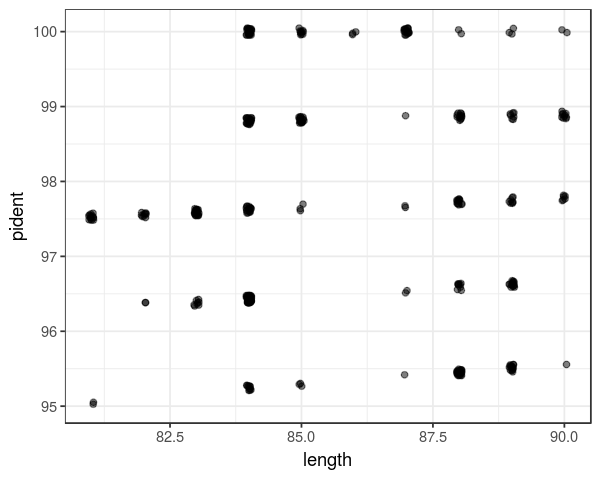

In [144]:
# distribution of hit quality
p = blast_res %>%
    ggplot(aes(length, pident)) +
    geom_jitter(width=0.05, height=0.05, alpha=0.5) +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=4)
plot(p)

# Getting distribution of OTUs

* The abundance of OTUs in EMP samples

In [145]:
# loading distribution table
emp_otu_dist = data.table::fread(emp_otu_dist_file, sep='\t') %>%
    inner_join(blast_res, c('V1'='saccver'))

emp_otu_dist %>% dfhead

[1] 389  22


V1,sequence,num_samples,num_samples_frac,num_samples_rank,total_obs,total_obs_rank,total_obs_frac,taxonomy,list_samples,⋯,length,mismatch,gapopen,qlen,qstart,qend,slen,sstart,send,evalue
6705,GTCGGGTGTGAAATCTCGGAGCTTAACTCCGAAACTGCATTCGATACTGCCGTGCTTGAGGACTGGAGAGGAGACTGGAATTTACGGTGT,23,0.0115,6706,33,19595,3.639692e-06,k__Bacteria; p__Verrucomicrobia; c__[Spartobacteria]; o__[Chthoniobacterales]; f__[Chthoniobacteraceae]; g__DA101; s__,"1627.BRZC,1289.KH54,2382.HE003.C181.HA.5.572.rhizo.4.12.lane7.NoIndex.L007.sequences,1717.KBC4.experimental.plot,990.KA3U.E.18,2382.DPOO1.C1.HA.1.228.root.9.11.lane1.NoIndex.L001.sequences,1521.Det.W6.s.8.1.sequences,1715.McG.NN1,990.KA3F.D.18,2382.RU006.C181.RH.1.777.rhizo.9.12.lane7.NoIndex.L007.sequences,805.pH.7.0.year.2007,1521.AG3.s.8.1.sequences,2382.SH005.C3.RH.1.651.bulk.9.12.lane7.NoIndex.L007.sequences,1717.32.high.fertilizer,1521.NTP26.s.6.1.sequences,1711.KAJ7.2,2382.RU006.C181.RH.2.383.root.9.11.lane1.NoIndex.L001.sequences,2382.SH008.C6.HA.2.732.rhizo.9.12.lane7.NoIndex.L007.sequences,1714.McG.PC210,990.KA3F.D.12,2382.GM.181.R2.rhizo.10.12.lane7.NoIndex.L007.sequences,2382.SH004.C1.RH.3.612.rhizo.9.12.lane7.NoIndex.L007.sequences,2382.MU002.C3.HA.5.298.root.9.11.lane1.NoIndex.L001.sequences",⋯,90,0,0,230,45,134,90,1,90,9.29e-42
6705,GTCGGGTGTGAAATCTCGGAGCTTAACTCCGAAACTGCATTCGATACTGCCGTGCTTGAGGACTGGAGAGGAGACTGGAATTTACGGTGT,23,0.0115,6706,33,19595,3.639692e-06,k__Bacteria; p__Verrucomicrobia; c__[Spartobacteria]; o__[Chthoniobacterales]; f__[Chthoniobacteraceae]; g__DA101; s__,"1627.BRZC,1289.KH54,2382.HE003.C181.HA.5.572.rhizo.4.12.lane7.NoIndex.L007.sequences,1717.KBC4.experimental.plot,990.KA3U.E.18,2382.DPOO1.C1.HA.1.228.root.9.11.lane1.NoIndex.L001.sequences,1521.Det.W6.s.8.1.sequences,1715.McG.NN1,990.KA3F.D.18,2382.RU006.C181.RH.1.777.rhizo.9.12.lane7.NoIndex.L007.sequences,805.pH.7.0.year.2007,1521.AG3.s.8.1.sequences,2382.SH005.C3.RH.1.651.bulk.9.12.lane7.NoIndex.L007.sequences,1717.32.high.fertilizer,1521.NTP26.s.6.1.sequences,1711.KAJ7.2,2382.RU006.C181.RH.2.383.root.9.11.lane1.NoIndex.L001.sequences,2382.SH008.C6.HA.2.732.rhizo.9.12.lane7.NoIndex.L007.sequences,1714.McG.PC210,990.KA3F.D.12,2382.GM.181.R2.rhizo.10.12.lane7.NoIndex.L007.sequences,2382.SH004.C1.RH.3.612.rhizo.9.12.lane7.NoIndex.L007.sequences,2382.MU002.C3.HA.5.298.root.9.11.lane1.NoIndex.L001.sequences",⋯,90,0,0,230,45,134,90,1,90,9.29e-42
41632,GTCGGGTGTGAAATCTCGGGGCTTAACTCCGAAACTGCATTCGATACTGCCGTGCTTGAGGACTGGAGAGGAGACTGGAATTTACGGTGT,4,0.0020,41633,6,61665,6.617621e-07,k__Bacteria; p__Verrucomicrobia; c__[Spartobacteria]; o__[Chthoniobacterales]; f__[Chthoniobacteraceae]; g__DA101; s__,"2382.RU006.C181.RH.4.793.root.9.12.lane7.NoIndex.L007.sequences,1521.HI2.s.6.1.sequences,722.CC1.7.s.8.1.sequence,990.KA3F.D.12",⋯,90,1,0,230,45,134,90,1,90,4.32e-40


In [149]:
max_samps = emp_otu_dist %>%
    mutate(n_samples = stringr::str_count(list_samples, ',')) %>%
    .$n_samples %>% max
max_samps = max_samps + 1
cat('Max number of samples for any OTU:', max_samps, '\n')

emp_otu_dist_g = emp_otu_dist %>%
    dplyr::select(V1, num_samples, total_obs, total_obs_frac, taxonomy, list_samples, 
                  qaccver, pident, length, qlen, slen) %>%
    separate(list_samples, gsub('^', 'X', 1:max_samps), sep=',', fill='right') %>%
    gather(X, Sample, -V1, -num_samples, -total_obs, -total_obs_frac, -taxonomy,
           -qaccver, -pident, -length, -qlen, -slen) %>%
    filter(!is.na(Sample)) %>%
    rename('EMP_OTU' = V1) %>%
    dplyr::select(-X) 

cat('Number of OTUs:', emp_otu_dist_g$qaccver %>% unique %>% length, '\n')

emp_otu_dist_g %>% dfhead

Max number of samples for any OTU: 23 
Number of OTUs: 373 
[1] 439  11


EMP_OTU,num_samples,total_obs,total_obs_frac,taxonomy,qaccver,pident,length,qlen,slen,Sample
6705,23,33,3.639692e-06,k__Bacteria; p__Verrucomicrobia; c__[Spartobacteria]; o__[Chthoniobacterales]; f__[Chthoniobacteraceae]; g__DA101; s__,6f770f48d8a15df51fd6562441c955cf,100.000,90,230,90,1627.BRZC
6705,23,33,3.639692e-06,k__Bacteria; p__Verrucomicrobia; c__[Spartobacteria]; o__[Chthoniobacterales]; f__[Chthoniobacteraceae]; g__DA101; s__,c61bfed32b8e2dbddf8468195a583307,100.000,90,230,90,1627.BRZC
41632,4,6,6.617621e-07,k__Bacteria; p__Verrucomicrobia; c__[Spartobacteria]; o__[Chthoniobacterales]; f__[Chthoniobacteraceae]; g__DA101; s__,6f770f48d8a15df51fd6562441c955cf,98.889,90,230,90,2382.RU006.C181.RH.4.793.root.9.12.lane7.NoIndex.L007.sequences


In [150]:
# number of samples per OTU
emp_otu_dist_g %>%
    group_by(EMP_OTU) %>%
    summarize(n_samples = Sample %>% unique %>% length) %>%
    ungroup()

EMP_OTU,n_samples
6705,23
41632,4
88447,1
89553,1
101680,1
110330,1
112510,1
117057,1
128933,1
138283,1


## Getting biomes for each sample

In [151]:
emp_map = data.table::fread(emp_map_file, sep='\t') %>%
    dplyr::select(SampleID, study_id, env_biome, env_feature, env_material,
                  envo_biome_0, envo_biome_1, envo_biome_2, envo_biome_3,
                  envo_biome_4, envo_biome_5) %>%
    group_by(envo_biome_2) %>%
    mutate(num_samples_per_envo_biom_2 = SampleID %>% unique %>% length) %>%
    ungroup() %>%
    right_join(emp_otu_dist_g, c('SampleID'='Sample')) %>%
    filter(!is.na(SampleID))
    

emp_map$num_samples_per_envo_biom_2 %>% summary %>% print
emp_map %>% dfhead

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    300    3093    3093    5458    9825    9825 
[1] 439  22


SampleID,study_id,env_biome,env_feature,env_material,envo_biome_0,envo_biome_1,envo_biome_2,envo_biome_3,envo_biome_4,⋯,EMP_OTU,num_samples,total_obs,total_obs_frac,taxonomy,qaccver,pident,length,qlen,slen
1627.BRZC,1627,Small lake biome,lake,sediment,biome,aquatic biome,freshwater biome,freshwater lake biome,Small lake biome,⋯,6705,23,33,3.639692e-06,k__Bacteria; p__Verrucomicrobia; c__[Spartobacteria]; o__[Chthoniobacterales]; f__[Chthoniobacteraceae]; g__DA101; s__,6f770f48d8a15df51fd6562441c955cf,100.000,90,230,90
1627.BRZC,1627,Small lake biome,lake,sediment,biome,aquatic biome,freshwater biome,freshwater lake biome,Small lake biome,⋯,6705,23,33,3.639692e-06,k__Bacteria; p__Verrucomicrobia; c__[Spartobacteria]; o__[Chthoniobacterales]; f__[Chthoniobacteraceae]; g__DA101; s__,c61bfed32b8e2dbddf8468195a583307,100.000,90,230,90
2382.RU006.C181.RH.4.793.root.9.12.lane7.NoIndex.L007.sequences,2382,cropland biome,vineyard,organic material,biome,terrestrial biome,anthropogenic terrestrial biome,cropland biome,,⋯,41632,4,6,6.617621e-07,k__Bacteria; p__Verrucomicrobia; c__[Spartobacteria]; o__[Chthoniobacterales]; f__[Chthoniobacteraceae]; g__DA101; s__,6f770f48d8a15df51fd6562441c955cf,98.889,90,230,90


In [152]:
emp_map_s = emp_map %>%
    group_by(qaccver, envo_biome_2) %>%
    summarize(prevalence = n() / first(num_samples_per_envo_biom_2) * 100) %>%
    ungroup()

emp_map_s$prevalence %>% summary
emp_map_s %>% dfhead

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01018 0.01018 0.03233 0.03658 0.03233 1.66667 

[1] 379   3


qaccver,envo_biome_2,prevalence
0041e90ca30bb8f9b1b682f96896bc9a,anthropogenic terrestrial biome,0.01017812
00c4719f18dc5a3c5500869ae09d7d6f,marine biome,0.03233107
04f12713590929f2b95ef147e154e791,marine biome,0.03233107


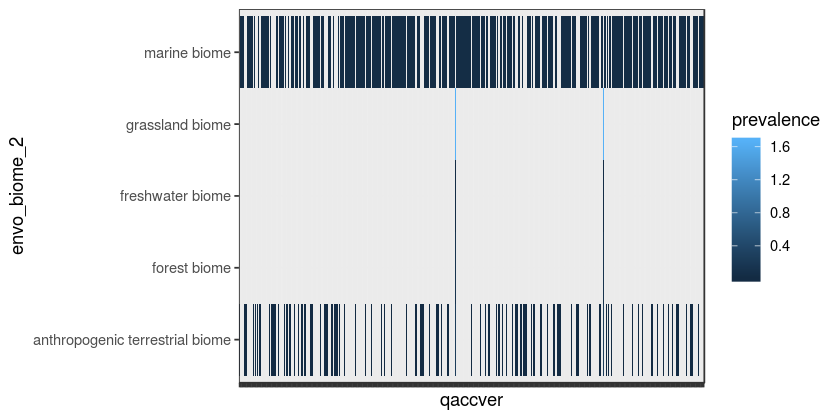

In [153]:
# OTU-sample distribution
p = emp_map_s %>%
    ggplot(aes(qaccver, envo_biome_2, fill=prevalence)) +
    geom_tile() +
    theme_bw() +
    theme(
        axis.text.x = element_blank()
    )

options(repr.plot.width=7, repr.plot.height=3.5)
plot(p)

## Adding OTU taxonomy and animal-dist

In [159]:
# otu file
otu = physeq_file %>%
    readRDS() %>%
    otu_table %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(OTU = rownames(.)) %>%
    gather(Sample, Abund, -OTU) %>%
    semi_join(emp_map_s, c('OTU'='qaccver'))

otu %>% dfhead

[1] 68586     3


OTU,Sample,Abund
c61bfed32b8e2dbddf8468195a583307,X1.Eurasian.Beaver,0
b354a57883c325013bedff42697a39b6,X1.Eurasian.Beaver,0
8a3e3dbc2056adfb52533920c983ac86,X1.Eurasian.Beaver,0


### Animal abundance

In [160]:
# adding metdata
metadata = physeq_file %>%
    readRDS() %>%
    sample_data %>%
    dplyr::select(X.SampleID, class, order, family, genus, diet) 

metadata %>% dfhead

[1] 213   6


,X.SampleID,class,order,family,genus,diet
X1.Eurasian.Beaver,X1.Eurasian.Beaver,Mammalia,Rodentia,Castoridae,Castor,herbivore
X101.Horse,X101.Horse,Mammalia,Perissodactyla,Equidae,Equus,herbivore
X102.Kulan,X102.Kulan,Mammalia,Perissodactyla,Equidae,Equus,herbivore


In [161]:
# calc % prevalence of each OTU in each animal class
otu_s = otu %>%
    inner_join(metadata, c('Sample'='X.SampleID')) %>%
    group_by(OTU, class) %>%
    summarize(total_samples = Sample %>% unique %>% length,
              prevalence = sum(Abund > 0) / total_samples * 100) %>%
    ungroup()

otu_s$prevalence %>% summary %>% print
otu_s %>% dfhead

Warning message:
“Column `Sample`/`X.SampleID` joining character vector and factor, coercing into character vector”

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.314   0.000  60.000 
[1] 1610    4


OTU,class,total_samples,prevalence
0041e90ca30bb8f9b1b682f96896bc9a,Actinopterygii,9,0
0041e90ca30bb8f9b1b682f96896bc9a,Amphibia,5,0
0041e90ca30bb8f9b1b682f96896bc9a,Aves,30,0


### env abundance

In [162]:
otu_s_j = rbind(otu_s %>%
        dplyr::select(-total_samples) %>%
        rename('biome' = class),
      emp_map_s %>%
        rename('OTU' = qaccver,
               'biome' = envo_biome_2))

otu_s_j %>% dfhead

[1] 1989    3


OTU,biome,prevalence
0041e90ca30bb8f9b1b682f96896bc9a,Actinopterygii,0
0041e90ca30bb8f9b1b682f96896bc9a,Amphibia,0
0041e90ca30bb8f9b1b682f96896bc9a,Aves,0


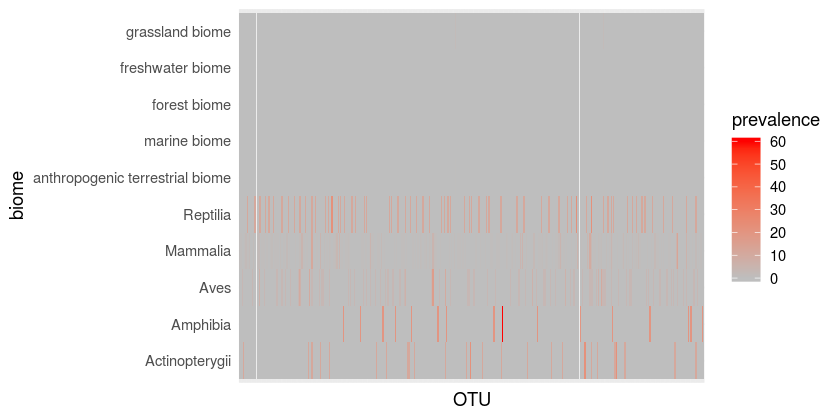

In [164]:
# OTU-sample distribution
p = otu_s_j %>%
    complete(OTU, biome) %>%
    mutate(prevalence = ifelse(is.na(prevalence), 0, prevalence)) %>%
    ggplot(aes(OTU, biome, fill=prevalence)) +
    geom_tile() +
    scale_fill_gradient(low='grey', high='red') +
    theme_minimal() +
    theme(
        axis.text.x = element_blank()
    )

options(repr.plot.width=7, repr.plot.height=3.5)
plot(p)

# sessionInfo

In [141]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.1 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2  phyloseq_1.22.3 ggplot2_3.0.0   tidyr_0.8.1    
[5] dplyr_0.7.6    

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17        ape_5.1             lattice_0.20-34    
 [4] Biostrings_2.46.0   assertthat_0.2.0    digest_0.6.15      
 [7] foreach_1.4.4       IRdisplay_0.4.4     R6_2.2.2           
[10] plyr_1.8.4          repr_0.15.0         stats4_3.4.1       
[13] evaluate_0.10.1     pillar_1.2.2        zlibbioc_1.24.0    
[16] rlang_0.2.1         lazyeval_0.2.1      uuid_0.1-2         
[19] data.table_